In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
# !pip install tensorflow-addons
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential, Model


In [35]:
image = Image.open('pizza.jpeg')

image = np.array(image.resize(size=(227,227)))

(224, 224, 3)

(<matplotlib.image.AxesImage at 0x2a9993be0>, TensorShape([224, 224, 3]))

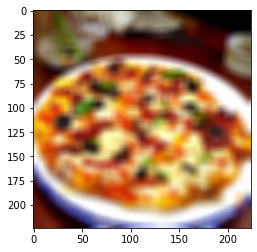

In [48]:
blur_image = tfa.image.gaussian_filter2d(image,filter_shape=10,sigma=200)
plt.imshow(blur_image)

In [90]:
# ORIGINAL ARCHITECTURE OF ALEXNET

input_layer = Input((227,227,3))

conv1 = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(input_layer)

batchnorm1 = BatchNormalization()(conv1)

maxpool1 = MaxPool2D(pool_size=(3,3), strides=(2,2))(batchnorm1)

conv2 = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), 
               activation='relu', padding="same")(maxpool1)

batchnorm2 = BatchNormalization()(conv2)

maxpool2 = MaxPool2D(pool_size=(3,3), strides=(2,2))(batchnorm2)

conv3 = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), 
               activation='relu', padding="same")(maxpool2)

batchnorm3 = BatchNormalization()(conv3)

conv4 = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), 
               activation='relu', padding="same")(batchnorm3)

batchnorm4 = BatchNormalization()(conv4)

conv5 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
               activation='relu', padding="same")(batchnorm4)

batchnorm5 = BatchNormalization()(conv5)

maxpool3 = MaxPool2D(pool_size=(3,3), strides=(2,2))(batchnorm5)

flatten = Flatten()(maxpool3)

dense1 = Dense(4096, activation='relu')(flatten)

dropout1 = Dropout(0.5)(dense1)

dense2 = Dense(4096, activation='relu')(dropout1)

dropout2 = Dropout(0.5)(dense2)

output_layer = Dense(10, activation='softmax')(dropout2)

# Getting the model
original_model = Model(inputs=input_layer, outputs=output_layer)
original_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_51 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_52 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 256)       0   

In [85]:
# weights = np.load('bvlc_alexnet.npy', encoding='bytes').item()

weights = np.load(open("bvlc_alexnet.npy", "rb"), encoding="latin1", allow_pickle=True).item()


keys = ['conv1', 'conv2', 'conv3','conv4','conv5', 'fc6', 'fc7','fc8']


In [89]:
original_model_layers = [1, 4, 7, 9, 11, 15, 17, 19]

for idx, oml in enumerate(original_model_layers):
    print(oml, keys[idx], original_model.layers[oml])
    original_model.layers[oml].set_weights(weights[keys[idx]])
    

1 conv1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x29495a5b0>
4 conv2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x294927fd0>


ValueError: Layer weight shape (5, 5, 96, 256) not compatible with provided weight shape (5, 5, 48, 256)

In [65]:
input_layer = InputLayer((224,224,3))

conv1 = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3))

batchnorm1 = BatchNormalization()

maxpool1 = MaxPool2D(pool_size=(3,3), strides=(2,2))

conv2 = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")

batchnorm2 = BatchNormalization()

maxpool2 = MaxPool2D(pool_size=(3,3), strides=(2,2))

conv3 = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")

batchnorm3 = BatchNormalization()

conv4 = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")

batchnorm4 = BatchNormalization()

conv5 = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")

batchnorm5 = BatchNormalization()

maxpool3 = MaxPool2D(pool_size=(3,3), strides=(2,2))

flatten = Flatten()

dense1 = Dense(4096, activation='relu')

dropout1 = Dropout(0.5)

dense2 = Dense(4096, activation='relu')

dropout2 = Dropout(0.5)

output_layer = Dense(10, activation='softmax')



In [60]:

original_model = Model(inputs=input_layer)

TypeError: ('Keyword argument not understood:', 'inputs')